Градиентный спуск для минимизации квадратичной функции:
 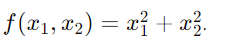 


In [ ]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def f(x):
    return x[0]**2 + x[1]**2

def gradient_f(x):
    return np.array([2*x[0], 2*x[1]])


def gradient_descent(x0, alpha, threshold, max_iter):
    x = np.array(x0, dtype=float)
    grad_norms = []
    iterations = 0

    for _ in range(max_iter):
        grad = gradient_f(x)
        grad_norm = np.linalg.norm(grad)
        grad_norms.append(grad_norm)

        if grad_norm < threshold:
            break

        x = x - alpha * grad
        iterations += 1

    return x, iterations, grad_norms



Точка минимума: [3.29100911e-07 3.29100911e-07]
Число итераций: 70


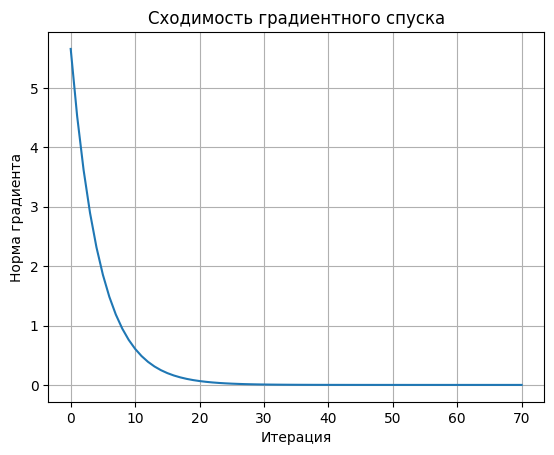

In [ ]:
x0 = [2, 2]
alpha = 0.1
threshold = 1e-6
max_iter = 1000

result, iterations, grad_norms = gradient_descent(x0, alpha, threshold, max_iter)


print(f"Точка минимума: {result}")
print(f"Число итераций: {iterations}")



plt.plot(grad_norms)
plt.xlabel("Итерация")
plt.ylabel("Норма градиента")
plt.title("Сходимость градиентного спуска")

plt.grid()
plt.show()

Метод Ньютона для минимизации функции:

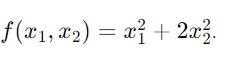


In [ ]:
def f(x):
    return x[0]**2 + 2 * x[1]**2


def gradient_f(x):
    return np.array([2 * x[0], 4 * x[1]])


# Гессиан (матрица вторых производных) функции f(x)
def hessian_f(x):
    return np.array([[2, 0], [0, 4]])

"""
Если гессиан не положительно определен, метод Ньютона может ошибочно направить нас в точку максимума или седловую точку,
что сделает метод неустойчивым или некорректным.
"""



def newton_method(x0, threshold=1e-6, max_iter=1000, alpha=1.0, beta=0.5, gamma=1e-3, min_step=1e-10):

    # beta: Коэффициент уменьшения шага (для адаптивного поиска)
    # gamma: Малое значение для корректировки гессиана (в случае его неопределенности)

    x = np.array(x0, dtype=float)
    values = [f(x)]

    for i in range(max_iter):
      grad = gradient_f(x)  # Градиент
      hessian = hessian_f(x)

      # Проверка положительной определенности гессиана:
      # Если хотя бы одно собственное значение меньше или равно 0, гессиан не положительно определён.
      if not np.all(np.linalg.eigvals(hessian) > 0):
        hessian += gamma * np.eye(len(x))


      # Решение системы H * delta_x = -grad
      delta_x = np.linalg.solve(hessian, -grad)


      step = alpha
      while f(x + step * delta_x) >= f(x): # Если значение функции не уменьшается:
          step *= beta  # Уменьшаем шаг
          if step < min_step:
                print("Шаг стал слишком малым. Прерываем адаптивный поиск.")
                break


      x += delta_x * step

      values.append(f(x))


      # Критерий остановки
      # Если норма градиента (векторной производной) меньше порога threshold, считаем, что метод сошелся
      if np.linalg.norm(grad) < threshold:
          print(f"Метод сошелся за {i + 1} итераций.")
          return x, i + 1, values

    return x, max_iter, values

In [ ]:
start_point = [3, 3]

result, iterations, values = newton_method(start_point)

print(f"Точка минимума: {result}")

Шаг стал слишком малым. Прерываем адаптивный поиск.
Метод сошелся за 2 итераций.
Точка минимума: [0. 0.]


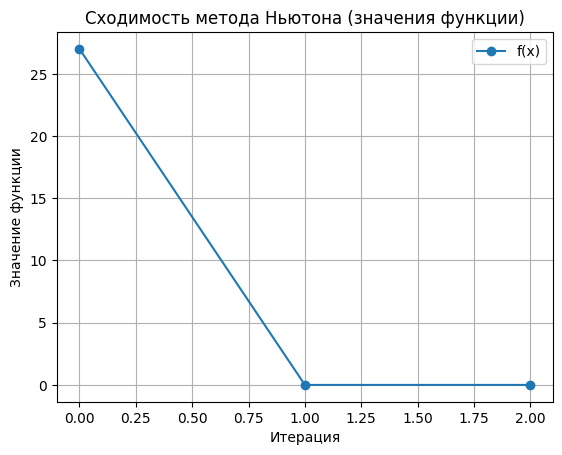

In [ ]:
plt.plot(values, label="f(x)", marker="o")
plt.xlabel("Итерация")
plt.ylabel("Значение функции")
plt.title("Сходимость метода Ньютона (значения функции)")
plt.grid()
plt.legend()
plt.show()
